Importing environment, state process function and DQN solver function

In [1]:
# environment and DQN solver
from puck_dqn import DQN_agent, puckworld_dqn
from puck_ddqn import DDQN_agent, puckworld_ddqn

# plotting packages
import pandas as pd
import matplotlib.pyplot as plt

# for state processor
from math import atan2, sqrt
import numpy as np

# ignore tensorflow deprication warnings

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
# using watermark for reproducibility
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,pandas

2020-02-06 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
matplotlib 3.1.1
pandas 1.0.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


### Puck World Implementation

Function to convert game state to np array of good and bad puck bearing and range

In [2]:
def state_bear_range(state):
    
    agent_loc = np.array([state['player_x'], state['player_y']])
    
    good_range = sqrt((state['player_x'] - state['good_creep_x'])**2 + (state['player_y'] - state['good_creep_y'])**2)
    
    bad_range = sqrt((state['player_x'] - state['bad_creep_x'])**2 + (state['player_y'] - state['bad_creep_y'])**2)
    
    range_vec = np.append(good_range, bad_range) // 1
    
    good_bearing = -atan2((state['good_creep_x'] - state['player_x']), state['good_creep_y']) - (state['player_y'])
    
    bad_bearing = -atan2((state['good_creep_x'] - state['player_x']), (state['good_creep_y']) - (state['player_y']))
    
    bearing_vec = np.append(good_bearing, bad_bearing).round(decimals = 2)
    
    state_vec = np.concatenate([range_vec, bearing_vec, agent_loc])
    
    return state_vec

Function to convert game state to np array of self, good and bad location and velocity

In [3]:
def state_loc_velocity(state):
    
    return np.array(list(state.values())).round(0)

Training agent

In [3]:
puckworld_dqn(process_state = state_loc_velocity, display = True, max_iterations = 1000)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






Run: 0, exploration: 0.2, score: -35283.11999999997


Run: 1, exploration: 0.1991017979015743, score: -34302.99999999994
Run: 2, exploration: 0.19810852582337762, score: -25181.979999999974
Run: 3, exploration: 0.19712020894614707, score: -23197.199999999964
Run: 4, exploration: 0.19613682254954962, score: -35378.73000000002
Run: 5, exploration: 0.19515834203657606, score: -26262.98999999998
Run: 6, exploration: 0.19418474293292606, score: -32633.409999999967
Run: 7, exploration: 0.1932160008863955, score: -22684.109999999997
Run: 8, exploration: 0.192252091666268, score: -16976.93
Run: 9, exploration: 0.19129299116270845, score: -21738.510000000028
Run: 10, exploration: 0.19033867538615995, score: -6440.620000000006
Run: 11, exploration: 0.1893891204667439, score: -20915.99999999998
Run: 12, exploration: 0.18844430265366297, score: -24127.430000000008
Run: 13, exploration: 0.1875041

Run: 78, exploration: 0.13546590148284257, score: -27759.88999999996
Run: 79, exploration: 0.13479009393660854, score: -22543.38999999999
Run: 80, exploration: 0.13411765783539897, score: -28810.04000000004
Run: 81, exploration: 0.13344857635986707, score: -21328.400000000005
Run: 82, exploration: 0.13278283277457367, score: -38341.920000000006
Run: 83, exploration: 0.1321204104275688, score: -32408.230000000043
Run: 84, exploration: 0.1314612927499752, score: -22640.550000000025
Run: 85, exploration: 0.13080546325557388, score: -21125.830000000016
Run: 86, exploration: 0.13015290554039155, score: -30254.100000000042
Run: 87, exploration: 0.12950360328229066, score: -25968.369999999955
Run: 88, exploration: 0.1288575402405609, score: -36860.569999999876
Run: 89, exploration: 0.12821470025551301, score: -23685.76
Run: 90, exploration: 0.12757506724807469, score: -35821.81000000012
Run: 91, exploration: 0.1269386252193883, score: -22293.98000000002
Run: 92, exploration: 0.126305358250410

Run: 196, exploration: 0.0750813663313525, score: -22016.60999999996
Run: 197, exploration: 0.07470680303983135, score: -20645.22999999998
Run: 198, exploration: 0.07433410835654432, score: -16181.979999999989
Run: 199, exploration: 0.07396327295944406, score: -20127.060000000016
Run: 200, exploration: 0.07359428757298875, score: -32872.999999999935
Run: 201, exploration: 0.07322714296791005, score: -28792.930000000004
Run: 202, exploration: 0.07286182996098234, score: -29078.489999999994
Run: 203, exploration: 0.07249833941479282, score: -21888.440000000013
Run: 204, exploration: 0.07213666223751321, score: -30432.739999999874
Run: 205, exploration: 0.07177678938267212, score: -31671.199999999928
Run: 206, exploration: 0.07141871184892905, score: -19000.030000000002
Run: 207, exploration: 0.07106242067984886, score: -28233.690000000006
Run: 208, exploration: 0.07070790696367812, score: -21460.230000000003
Run: 209, exploration: 0.07035516183312199, score: -23199.159999999963
Run: 210,

Run: 313, exploration: 0.041822150319398906, score: -29652.750000000102
Run: 314, exploration: 0.04161350944020936, score: -33700.46999999995
Run: 315, exploration: 0.041405909421332744, score: -23174.889999999996
Run: 316, exploration: 0.04119934507016158, score: -24332.24
Run: 317, exploration: 0.04099381121999307, score: -16662.619999999995
Run: 318, exploration: 0.04078930272989991, score: -29067.759999999955
Run: 319, exploration: 0.04058581448460165, score: -16865.05
Run: 320, exploration: 0.04038334139433676, score: -20828.17000000001
Run: 321, exploration: 0.04018187839473537, score: -27662.870000000115
Run: 322, exploration: 0.039981420446692534, score: -25167.27000000002
Run: 323, exploration: 0.03978196253624226, score: -17908.450000000015
Run: 324, exploration: 0.039583499674432, score: -14062.859999999986
Run: 325, exploration: 0.03938602689719793, score: -20787.990000000053
Run: 326, exploration: 0.03918953926524078, score: -36555.30000000001
Run: 327, exploration: 0.0389

Run: 431, exploration: 0.02317973862443447, score: -19774.019999999902
Run: 432, exploration: 0.02306410035597981, score: -42057.17999999997
Run: 433, exploration: 0.022949038979669954, score: -31842.11000000013
Run: 434, exploration: 0.022834551617525574, score: -52428.65999999976
Run: 435, exploration: 0.0227206354059249, score: -24200.11999999999
Run: 436, exploration: 0.0226072874955321, score: -13351.760000000015
Run: 437, exploration: 0.022494505051226008, score: -15582.840000000022
Run: 438, exploration: 0.02238228525202921, score: -12870.589999999956
Run: 439, exploration: 0.022270625291037474, score: -34633.30999999999
Run: 440, exploration: 0.022159522375349572, score: -20048.80000000005
Run: 441, exploration: 0.022048973725997394, score: -34868.67000000012
Run: 442, exploration: 0.021938976577876454, score: -25716.71
Run: 443, exploration: 0.021829528179676712, score: -31710.139999999737
Run: 444, exploration: 0.02172062579381378, score: -29121.180000000066
Run: 445, explora

Run: 548, exploration: 0.012911679162006173, score: -36525.54000000004
Run: 549, exploration: 0.012847265829080898, score: -42825.62999999988
Run: 550, exploration: 0.01278317383913561, score: -44070.099999999926
Run: 551, exploration: 0.0127194015890657, score: -39278.64000000002
Run: 552, exploration: 0.012655947483764075, score: -25473.600000000053
Run: 553, exploration: 0.01259280993608125, score: -32006.97000000018
Run: 554, exploration: 0.012529987366785665, score: -29859.63000000001
Run: 555, exploration: 0.012467478204524169, score: -19186.11000000012
Run: 556, exploration: 0.012405280885782721, score: -40590.94000000007
Run: 557, exploration: 0.012343393854847288, score: -23216.640000000014
Run: 558, exploration: 0.012281815563764929, score: -34735.729999999814
Run: 559, exploration: 0.01222054447230507, score: -35151.64000000011
Run: 560, exploration: 0.012159579047920994, score: -34482.28000000002
Run: 561, exploration: 0.012098917765711497, score: -34814.11000000004
Run: 56

Run: 663, exploration: 0.009999832740172363, score: -27869.849999999988
Run: 664, exploration: 0.009999832740172363, score: -31835.780000000093
Run: 665, exploration: 0.009999832740172363, score: -18015.129999999983
Run: 666, exploration: 0.009999832740172363, score: -14242.969999999994
Run: 667, exploration: 0.009999832740172363, score: -12282.270000000008
Run: 668, exploration: 0.009999832740172363, score: -12572.09
Run: 669, exploration: 0.009999832740172363, score: -23314.869999999984
Run: 670, exploration: 0.009999832740172363, score: -28995.770000000033
Run: 671, exploration: 0.009999832740172363, score: -33748.94
Run: 672, exploration: 0.009999832740172363, score: -37659.04999999984
Run: 673, exploration: 0.009999832740172363, score: -33446.059999999925
Run: 674, exploration: 0.009999832740172363, score: -36116.03000000008
Run: 675, exploration: 0.009999832740172363, score: -27916.469999999827
Run: 676, exploration: 0.009999832740172363, score: -18477.7599999999
Run: 677, explor

Run: 779, exploration: 0.009999832740172363, score: -29597.349999999722
Run: 780, exploration: 0.009999832740172363, score: -23549.77999999998
Run: 781, exploration: 0.009999832740172363, score: -26249.65000000001
Run: 782, exploration: 0.009999832740172363, score: -22282.839999999982
Run: 783, exploration: 0.009999832740172363, score: -16311.370000000008
Run: 784, exploration: 0.009999832740172363, score: -25784.620000000068
Run: 785, exploration: 0.009999832740172363, score: -40259.16999999986
Run: 786, exploration: 0.009999832740172363, score: -12125.200000000043
Run: 787, exploration: 0.009999832740172363, score: -13442.320000000014
Run: 788, exploration: 0.009999832740172363, score: -5933.569999999996
Run: 789, exploration: 0.009999832740172363, score: -19114.92999999997
Run: 790, exploration: 0.009999832740172363, score: -16309.38999999999
Run: 791, exploration: 0.009999832740172363, score: -42050.93000000015
Run: 792, exploration: 0.009999832740172363, score: -42057.38999999974


Run: 894, exploration: 0.009999832740172363, score: -29492.03999999994
Run: 895, exploration: 0.009999832740172363, score: -20962.39
Run: 896, exploration: 0.009999832740172363, score: -17099.030000000013
Run: 897, exploration: 0.009999832740172363, score: -18606.770000000146
Run: 898, exploration: 0.009999832740172363, score: -28416.20999999995
Run: 899, exploration: 0.009999832740172363, score: -38488.319999999985
Run: 900, exploration: 0.009999832740172363, score: -24800.129999999957
Run: 901, exploration: 0.009999832740172363, score: -33273.560000000165
Run: 902, exploration: 0.009999832740172363, score: -33209.600000000064
Run: 903, exploration: 0.009999832740172363, score: -38180.909999999916
Run: 904, exploration: 0.009999832740172363, score: -14545.370000000008
Run: 905, exploration: 0.009999832740172363, score: -29735.419999999842
Run: 906, exploration: 0.009999832740172363, score: -24640.239999999983
Run: 907, exploration: 0.009999832740172363, score: -31761.359999999895
Run:

Training DDQN agent

In [4]:
puckworld_ddqn(process_state = state_bear_range, display = True, max_iterations = 4500)











Run: 1, exploration: 0.4, score: -15.441
Run: 2, exploration: 0.4, score: -5.662
Run: 3, exploration: 0.4, score: -10.04
Run: 4, exploration: 0.4, score: -11.321
Run: 5, exploration: 0.4, score: -12.18
Run: 6, exploration: 0.4, score: -10.545
Run: 7, exploration: 0.4, score: -9.748
Run: 8, exploration: 0.4, score: -13.981
Run: 9, exploration: 0.4, score: -8.246
Run: 10, exploration: 0.4, score: -9.89
Run: 11, exploration: 0.4, score: -5.793
Run: 12, exploration: 0.4, score: -10.898
Run: 13, exploration: 0.4, score: -10.656
Run: 14, exploration: 0.4, score: -10.638
Run: 15, exploration: 0.4, score: -12.272
Run: 16, exploration: 0.4, score: -7.01
Run: 17, exploration: 0.4, score: -8.521
Run: 18, exploration: 0.4, score: -8.694
Run: 19, exploration: 0.4, score: -12.205
Run: 20, exploration: 0.4, score: -6.925
Run: 21, exploration: 0.4, score: -10.122


Run: 22, exploration: 0.398, score: -10.071
Run: 23, exploration: 0.396, score: -15.61
Run: 24, exploration: 0.394, score: -11.6

Run: 131, exploration: 0.23, score: -16.138
Run: 132, exploration: 0.229, score: -12.899
Run: 133, exploration: 0.228, score: -9.204
Run: 134, exploration: 0.227, score: -8.613
Run: 135, exploration: 0.226, score: -14.664
Run: 136, exploration: 0.225, score: -12.043
Run: 137, exploration: 0.224, score: -15.905
Run: 138, exploration: 0.223, score: -14.323
Run: 139, exploration: 0.221, score: -5.438
Run: 140, exploration: 0.22, score: -8.534
Run: 141, exploration: 0.219, score: -10.558
Run: 142, exploration: 0.218, score: -14.79
Run: 143, exploration: 0.217, score: -3.759
Run: 144, exploration: 0.216, score: -11.024
Run: 145, exploration: 0.215, score: -17.04
Run: 146, exploration: 0.214, score: -4.675
Run: 147, exploration: 0.213, score: -8.112
Run: 148, exploration: 0.212, score: -13.201
Run: 149, exploration: 0.211, score: -7.708
Run: 150, exploration: 0.21, score: -7.568
Run: 151, exploration: 0.208, score: -7.905
Run: 152, exploration: 0.207, score: -12.969
Run: 153, exploration: 0.

Run: 316, exploration: 0.091, score: -7.558
Run: 317, exploration: 0.091, score: -9.619
Run: 318, exploration: 0.09, score: -12.316
Run: 319, exploration: 0.09, score: -16.413
Run: 320, exploration: 0.089, score: -7.848
Run: 321, exploration: 0.089, score: -11.031
Run: 322, exploration: 0.088, score: -10.219
Run: 323, exploration: 0.088, score: -11.898
Run: 324, exploration: 0.088, score: -7.602
Run: 325, exploration: 0.087, score: -12.717
Run: 326, exploration: 0.087, score: -11.723
Run: 327, exploration: 0.086, score: -18.989
Run: 328, exploration: 0.086, score: -11.765
Run: 329, exploration: 0.085, score: -18.075
Run: 330, exploration: 0.085, score: -14.113
Run: 331, exploration: 0.085, score: -11.818
Run: 332, exploration: 0.084, score: -17.261
Run: 333, exploration: 0.084, score: -22.351
Run: 334, exploration: 0.083, score: -7.776
Run: 335, exploration: 0.083, score: -17.915
Run: 336, exploration: 0.082, score: -19.433
Run: 337, exploration: 0.082, score: -11.606
Run: 338, explora

Run: 500, exploration: 0.036, score: -14.482
Run: 501, exploration: 0.036, score: -13.006
Run: 502, exploration: 0.036, score: -11.716
Run: 503, exploration: 0.036, score: -15.176
Run: 504, exploration: 0.036, score: -11.074
Run: 505, exploration: 0.035, score: -10.891
Run: 506, exploration: 0.035, score: -13.123
Run: 507, exploration: 0.035, score: -14.052
Run: 508, exploration: 0.035, score: -9.816
Run: 509, exploration: 0.035, score: -10.799
Run: 510, exploration: 0.034, score: -16.535
Run: 511, exploration: 0.034, score: -17.348
Run: 512, exploration: 0.034, score: -13.835
Run: 513, exploration: 0.034, score: -13.261
Run: 514, exploration: 0.034, score: -6.573
Run: 515, exploration: 0.034, score: -8.112
Run: 516, exploration: 0.033, score: -8.249
Run: 517, exploration: 0.033, score: -8.2
Run: 518, exploration: 0.033, score: -7.436
Run: 519, exploration: 0.033, score: -10.753
Run: 520, exploration: 0.033, score: -12.196
Run: 521, exploration: 0.033, score: -4.149
Run: 522, explorati

Run: 684, exploration: 0.014, score: -17.761
Run: 685, exploration: 0.014, score: -11.241
Run: 686, exploration: 0.014, score: -11.087
Run: 687, exploration: 0.014, score: -12.945
Run: 688, exploration: 0.014, score: -12.963
Run: 689, exploration: 0.014, score: -8.477
Run: 690, exploration: 0.014, score: -11.57
Run: 691, exploration: 0.014, score: -17.61
Run: 692, exploration: 0.014, score: -8.255
Run: 693, exploration: 0.014, score: -15.605
Run: 694, exploration: 0.014, score: -18.795
Run: 695, exploration: 0.014, score: -16.387
Run: 696, exploration: 0.014, score: -13.112
Run: 697, exploration: 0.014, score: -13.295
Run: 698, exploration: 0.013, score: -15.679
Run: 699, exploration: 0.013, score: -17.662
Run: 700, exploration: 0.013, score: -15.398
Run: 701, exploration: 0.013, score: -10.893
Run: 702, exploration: 0.013, score: -22.396
Run: 703, exploration: 0.013, score: -15.961
Run: 704, exploration: 0.013, score: -15.642
Run: 705, exploration: 0.013, score: -11.589
Run: 706, expl

Run: 871, exploration: 0.01, score: -13.732
Run: 872, exploration: 0.01, score: -10.737
Run: 873, exploration: 0.01, score: -6.987
Run: 874, exploration: 0.01, score: -9.278
Run: 875, exploration: 0.01, score: -6.362
Run: 876, exploration: 0.01, score: -6.248
Run: 877, exploration: 0.01, score: -12.131
Run: 878, exploration: 0.01, score: -7.292
Run: 879, exploration: 0.01, score: -18.605
Run: 880, exploration: 0.01, score: -16.384
Run: 881, exploration: 0.01, score: -8.255
Run: 882, exploration: 0.01, score: -9.759
Run: 883, exploration: 0.01, score: -12.366
Run: 884, exploration: 0.01, score: -14.944
Run: 885, exploration: 0.01, score: -15.601
Run: 886, exploration: 0.01, score: -10.025
Run: 887, exploration: 0.01, score: -15.005
Run: 888, exploration: 0.01, score: -11.495
Run: 889, exploration: 0.01, score: -13.854
Run: 890, exploration: 0.01, score: -9.791
Run: 891, exploration: 0.01, score: -7.716
Run: 892, exploration: 0.01, score: -17.342
Run: 893, exploration: 0.01, score: -17.9

Run: 1058, exploration: 0.01, score: -17.289
Run: 1059, exploration: 0.01, score: -19.27
Run: 1060, exploration: 0.01, score: -12.651
Run: 1061, exploration: 0.01, score: -20.524
Run: 1062, exploration: 0.01, score: -19.451
Run: 1063, exploration: 0.01, score: -8.296
Run: 1064, exploration: 0.01, score: -15.789
Run: 1065, exploration: 0.01, score: -13.859
Run: 1066, exploration: 0.01, score: -20.075
Run: 1067, exploration: 0.01, score: -15.51
Run: 1068, exploration: 0.01, score: -7.724
Run: 1069, exploration: 0.01, score: -15.834
Run: 1070, exploration: 0.01, score: -14.934
Run: 1071, exploration: 0.01, score: -19.481
Run: 1072, exploration: 0.01, score: -15.855
Run: 1073, exploration: 0.01, score: -15.48
Run: 1074, exploration: 0.01, score: -7.135
Run: 1075, exploration: 0.01, score: -14.984
Run: 1076, exploration: 0.01, score: -16.15
Run: 1077, exploration: 0.01, score: -12.162
Run: 1078, exploration: 0.01, score: -8.031
Run: 1079, exploration: 0.01, score: -14.304
Run: 1080, explora

Run: 1242, exploration: 0.01, score: -11.317
Run: 1243, exploration: 0.01, score: -13.081
Run: 1244, exploration: 0.01, score: -10.678
Run: 1245, exploration: 0.01, score: -9.418
Run: 1246, exploration: 0.01, score: -16.214
Run: 1247, exploration: 0.01, score: -8.359
Run: 1248, exploration: 0.01, score: -12.929
Run: 1249, exploration: 0.01, score: -16.259
Run: 1250, exploration: 0.01, score: -9.929
Run: 1251, exploration: 0.01, score: -10.319
Run: 1252, exploration: 0.01, score: -17.446
Run: 1253, exploration: 0.01, score: -16.882
Run: 1254, exploration: 0.01, score: -12.403
Run: 1255, exploration: 0.01, score: -9.251
Run: 1256, exploration: 0.01, score: -8.275
Run: 1257, exploration: 0.01, score: -18.747
Run: 1258, exploration: 0.01, score: -16.653
Run: 1259, exploration: 0.01, score: -23.1
Run: 1260, exploration: 0.01, score: -19.266
Run: 1261, exploration: 0.01, score: -14.029
Run: 1262, exploration: 0.01, score: -10.28
Run: 1263, exploration: 0.01, score: -7.694
Run: 1264, explorat

Run: 1426, exploration: 0.01, score: -16.503
Run: 1427, exploration: 0.01, score: -14.829
Run: 1428, exploration: 0.01, score: -19.819
Run: 1429, exploration: 0.01, score: -15.474
Run: 1430, exploration: 0.01, score: -15.126
Run: 1431, exploration: 0.01, score: -16.236
Run: 1432, exploration: 0.01, score: -17.831
Run: 1433, exploration: 0.01, score: -12.006
Run: 1434, exploration: 0.01, score: -5.017
Run: 1435, exploration: 0.01, score: -15.478
Run: 1436, exploration: 0.01, score: -20.402
Run: 1437, exploration: 0.01, score: -15.985
Run: 1438, exploration: 0.01, score: -8.391
Run: 1439, exploration: 0.01, score: -14.509
Run: 1440, exploration: 0.01, score: -20.14
Run: 1441, exploration: 0.01, score: -8.047
Run: 1442, exploration: 0.01, score: -18.61
Run: 1443, exploration: 0.01, score: -13.645
Run: 1444, exploration: 0.01, score: -12.311
Run: 1445, exploration: 0.01, score: -8.153
Run: 1446, exploration: 0.01, score: -9.061
Run: 1447, exploration: 0.01, score: -14.575
Run: 1448, explor

Run: 1610, exploration: 0.01, score: -9.836
Run: 1611, exploration: 0.01, score: -4.595
Run: 1612, exploration: 0.01, score: -6.348
Run: 1613, exploration: 0.01, score: -11.243
Run: 1614, exploration: 0.01, score: -14.279
Run: 1615, exploration: 0.01, score: -7.452
Run: 1616, exploration: 0.01, score: -14.886
Run: 1617, exploration: 0.01, score: -12.642
Run: 1618, exploration: 0.01, score: -15.694
Run: 1619, exploration: 0.01, score: -11.317
Run: 1620, exploration: 0.01, score: -12.914
Run: 1621, exploration: 0.01, score: -9.718
Run: 1622, exploration: 0.01, score: -12.028
Run: 1623, exploration: 0.01, score: -10.501
Run: 1624, exploration: 0.01, score: -11.797
Run: 1625, exploration: 0.01, score: -18.754
Run: 1626, exploration: 0.01, score: -20.364
Run: 1627, exploration: 0.01, score: -14.292
Run: 1628, exploration: 0.01, score: -19.23
Run: 1629, exploration: 0.01, score: -13.236
Run: 1630, exploration: 0.01, score: -7.077
Run: 1631, exploration: 0.01, score: -15.43
Run: 1632, explora

Run: 1794, exploration: 0.01, score: -18.257
Run: 1795, exploration: 0.01, score: -16.956
Run: 1796, exploration: 0.01, score: -15.855
Run: 1797, exploration: 0.01, score: -10.205
Run: 1798, exploration: 0.01, score: -8.346
Run: 1799, exploration: 0.01, score: -11.705
Run: 1800, exploration: 0.01, score: -19.142
Run: 1801, exploration: 0.01, score: -23.242
Run: 1802, exploration: 0.01, score: -8.65
Run: 1803, exploration: 0.01, score: -13.405
Run: 1804, exploration: 0.01, score: -9.228
Run: 1805, exploration: 0.01, score: -17.045
Run: 1806, exploration: 0.01, score: -12.549
Run: 1807, exploration: 0.01, score: -8.475
Run: 1808, exploration: 0.01, score: -19.76
Run: 1809, exploration: 0.01, score: -12.624
Run: 1810, exploration: 0.01, score: -7.839
Run: 1811, exploration: 0.01, score: -16.09
Run: 1812, exploration: 0.01, score: -12.153
Run: 1813, exploration: 0.01, score: -11.852
Run: 1814, exploration: 0.01, score: -16.089
Run: 1815, exploration: 0.01, score: -12.919
Run: 1816, explora

Run: 1978, exploration: 0.01, score: -17.463
Run: 1979, exploration: 0.01, score: -13.111
Run: 1980, exploration: 0.01, score: -10.289
Run: 1981, exploration: 0.01, score: -7.642
Run: 1982, exploration: 0.01, score: -14.586
Run: 1983, exploration: 0.01, score: -18.659
Run: 1984, exploration: 0.01, score: -11.146
Run: 1985, exploration: 0.01, score: -12.044
Run: 1986, exploration: 0.01, score: -11.847
Run: 1987, exploration: 0.01, score: -13.08
Run: 1988, exploration: 0.01, score: -15.952
Run: 1989, exploration: 0.01, score: -19.218
Run: 1990, exploration: 0.01, score: -8.913
Run: 1991, exploration: 0.01, score: -19.682
Run: 1992, exploration: 0.01, score: -16.774
Run: 1993, exploration: 0.01, score: -10.899
Run: 1994, exploration: 0.01, score: -10.654
Run: 1995, exploration: 0.01, score: -16.012
Run: 1996, exploration: 0.01, score: -18.971
Run: 1997, exploration: 0.01, score: -17.882
Run: 1998, exploration: 0.01, score: -19.245
Run: 1999, exploration: 0.01, score: -14.324
Run: 2000, ex

Run: 2162, exploration: 0.01, score: -6.5
Run: 2163, exploration: 0.01, score: -13.439
Run: 2164, exploration: 0.01, score: -5.489
Run: 2165, exploration: 0.01, score: -11.603
Run: 2166, exploration: 0.01, score: -14.437
Run: 2167, exploration: 0.01, score: -7.935
Run: 2168, exploration: 0.01, score: -8.654
Run: 2169, exploration: 0.01, score: -16.181
Run: 2170, exploration: 0.01, score: -14.733
Run: 2171, exploration: 0.01, score: -5.431
Run: 2172, exploration: 0.01, score: -5.918
Run: 2173, exploration: 0.01, score: -6.442
Run: 2174, exploration: 0.01, score: -17.559
Run: 2175, exploration: 0.01, score: -8.705
Run: 2176, exploration: 0.01, score: -13.655
Run: 2177, exploration: 0.01, score: -19.215
Run: 2178, exploration: 0.01, score: -15.515
Run: 2179, exploration: 0.01, score: -14.934
Run: 2180, exploration: 0.01, score: -8.354
Run: 2181, exploration: 0.01, score: -16.421
Run: 2182, exploration: 0.01, score: -10.706
Run: 2183, exploration: 0.01, score: -19.014
Run: 2184, exploratio

Run: 2346, exploration: 0.01, score: -17.02
Run: 2347, exploration: 0.01, score: -12.334
Run: 2348, exploration: 0.01, score: -18.901
Run: 2349, exploration: 0.01, score: -7.876
Run: 2350, exploration: 0.01, score: -4.713
Run: 2351, exploration: 0.01, score: -12.91
Run: 2352, exploration: 0.01, score: -9.563
Run: 2353, exploration: 0.01, score: -14.611
Run: 2354, exploration: 0.01, score: -15.181
Run: 2355, exploration: 0.01, score: -13.826
Run: 2356, exploration: 0.01, score: -6.539
Run: 2357, exploration: 0.01, score: -6.354
Run: 2358, exploration: 0.01, score: -10.502
Run: 2359, exploration: 0.01, score: -18.355
Run: 2360, exploration: 0.01, score: -8.125
Run: 2361, exploration: 0.01, score: -14.44
Run: 2362, exploration: 0.01, score: -15.45
Run: 2363, exploration: 0.01, score: -17.954
Run: 2364, exploration: 0.01, score: -17.282
Run: 2365, exploration: 0.01, score: -15.09
Run: 2366, exploration: 0.01, score: -12.36
Run: 2367, exploration: 0.01, score: -15.617
Run: 2368, exploration

Run: 2530, exploration: 0.01, score: -12.877
Run: 2531, exploration: 0.01, score: -13.789
Run: 2532, exploration: 0.01, score: -13.4
Run: 2533, exploration: 0.01, score: -18.774
Run: 2534, exploration: 0.01, score: -17.589
Run: 2535, exploration: 0.01, score: -14.562
Run: 2536, exploration: 0.01, score: -5.959
Run: 2537, exploration: 0.01, score: -11.918
Run: 2538, exploration: 0.01, score: -18.968
Run: 2539, exploration: 0.01, score: -19.586
Run: 2540, exploration: 0.01, score: -8.313
Run: 2541, exploration: 0.01, score: -11.928
Run: 2542, exploration: 0.01, score: -6.99
Run: 2543, exploration: 0.01, score: -6.938
Run: 2544, exploration: 0.01, score: -12.751
Run: 2545, exploration: 0.01, score: -14.099
Run: 2546, exploration: 0.01, score: -11.542
Run: 2547, exploration: 0.01, score: -10.64
Run: 2548, exploration: 0.01, score: -9.173
Run: 2549, exploration: 0.01, score: -18.574
Run: 2550, exploration: 0.01, score: -21.273
Run: 2551, exploration: 0.01, score: -14.317
Run: 2552, explorat

Run: 2714, exploration: 0.01, score: -20.459
Run: 2715, exploration: 0.01, score: -5.833
Run: 2716, exploration: 0.01, score: -10.712
Run: 2717, exploration: 0.01, score: -12.036
Run: 2718, exploration: 0.01, score: -16.341
Run: 2719, exploration: 0.01, score: -11.46
Run: 2720, exploration: 0.01, score: -17.691
Run: 2721, exploration: 0.01, score: -13.288
Run: 2722, exploration: 0.01, score: -7.657
Run: 2723, exploration: 0.01, score: -17.811
Run: 2724, exploration: 0.01, score: -11.006
Run: 2725, exploration: 0.01, score: -11.915
Run: 2726, exploration: 0.01, score: -12.503
Run: 2727, exploration: 0.01, score: -16.692
Run: 2728, exploration: 0.01, score: -11.124
Run: 2729, exploration: 0.01, score: -23.958
Run: 2730, exploration: 0.01, score: -10.037
Run: 2731, exploration: 0.01, score: -21.502
Run: 2732, exploration: 0.01, score: -14.359
Run: 2733, exploration: 0.01, score: -9.377
Run: 2734, exploration: 0.01, score: -5.747
Run: 2735, exploration: 0.01, score: -16.905
Run: 2736, expl

Run: 2898, exploration: 0.01, score: -12.648
Run: 2899, exploration: 0.01, score: -5.442
Run: 2900, exploration: 0.01, score: -17.761
Run: 2901, exploration: 0.01, score: -16.531
Run: 2902, exploration: 0.01, score: -18.271
Run: 2903, exploration: 0.01, score: -18.581
Run: 2904, exploration: 0.01, score: -8.717
Run: 2905, exploration: 0.01, score: -15.094
Run: 2906, exploration: 0.01, score: -6.829
Run: 2907, exploration: 0.01, score: -15.964
Run: 2908, exploration: 0.01, score: -5.755
Run: 2909, exploration: 0.01, score: -4.416
Run: 2910, exploration: 0.01, score: -4.5
Run: 2911, exploration: 0.01, score: -8.479
Run: 2912, exploration: 0.01, score: -6.652
Run: 2913, exploration: 0.01, score: -8.74
Run: 2914, exploration: 0.01, score: -16.398
Run: 2915, exploration: 0.01, score: -10.717
Run: 2916, exploration: 0.01, score: -8.522
Run: 2917, exploration: 0.01, score: -17.998
Run: 2918, exploration: 0.01, score: -9.429
Run: 2919, exploration: 0.01, score: -9.066
Run: 2920, exploration: 0

Run: 3082, exploration: 0.01, score: -8.873
Run: 3083, exploration: 0.01, score: -9.813
Run: 3084, exploration: 0.01, score: -8.995
Run: 3085, exploration: 0.01, score: -13.276
Run: 3086, exploration: 0.01, score: -8.003
Run: 3087, exploration: 0.01, score: -11.669
Run: 3088, exploration: 0.01, score: -8.769
Run: 3089, exploration: 0.01, score: -14.863
Run: 3090, exploration: 0.01, score: -13.438
Run: 3091, exploration: 0.01, score: -9.917
Run: 3092, exploration: 0.01, score: -11.422
Run: 3093, exploration: 0.01, score: -13.726
Run: 3094, exploration: 0.01, score: -16.958
Run: 3095, exploration: 0.01, score: -13.6
Run: 3096, exploration: 0.01, score: -7.058
Run: 3097, exploration: 0.01, score: -3.201
Run: 3098, exploration: 0.01, score: -17.922
Run: 3099, exploration: 0.01, score: -16.168
Run: 3100, exploration: 0.01, score: -16.844
Run: 3101, exploration: 0.01, score: -8.433
Run: 3102, exploration: 0.01, score: -9.179
Run: 3103, exploration: 0.01, score: -11.025
Run: 3104, exploration

Run: 3266, exploration: 0.01, score: -20.254
Run: 3267, exploration: 0.01, score: -14.877
Run: 3268, exploration: 0.01, score: -13.924
Run: 3269, exploration: 0.01, score: -15.913
Run: 3270, exploration: 0.01, score: -12.982
Run: 3271, exploration: 0.01, score: -11.977
Run: 3272, exploration: 0.01, score: -7.889
Run: 3273, exploration: 0.01, score: -7.944
Run: 3274, exploration: 0.01, score: -11.313
Run: 3275, exploration: 0.01, score: -7.024
Run: 3276, exploration: 0.01, score: -8.982
Run: 3277, exploration: 0.01, score: -7.396
Run: 3278, exploration: 0.01, score: -14.206
Run: 3279, exploration: 0.01, score: -9.138
Run: 3280, exploration: 0.01, score: -17.26
Run: 3281, exploration: 0.01, score: -6.316
Run: 3282, exploration: 0.01, score: -7.943
Run: 3283, exploration: 0.01, score: -10.468
Run: 3284, exploration: 0.01, score: -17.019
Run: 3285, exploration: 0.01, score: -6.795
Run: 3286, exploration: 0.01, score: -7.385
Run: 3287, exploration: 0.01, score: -3.422
Run: 3288, exploration

Run: 3450, exploration: 0.01, score: -9.921
Run: 3451, exploration: 0.01, score: -13.914
Run: 3452, exploration: 0.01, score: -20.648
Run: 3453, exploration: 0.01, score: -9.815
Run: 3454, exploration: 0.01, score: -11.763
Run: 3455, exploration: 0.01, score: -15.212
Run: 3456, exploration: 0.01, score: -9.711
Run: 3457, exploration: 0.01, score: -16.659
Run: 3458, exploration: 0.01, score: -15.538
Run: 3459, exploration: 0.01, score: -15.15
Run: 3460, exploration: 0.01, score: -9.394
Run: 3461, exploration: 0.01, score: -15.804
Run: 3462, exploration: 0.01, score: -9.048
Run: 3463, exploration: 0.01, score: -18.095
Run: 3464, exploration: 0.01, score: -13.141
Run: 3465, exploration: 0.01, score: -7.778
Run: 3466, exploration: 0.01, score: -13.452
Run: 3467, exploration: 0.01, score: -7.707
Run: 3468, exploration: 0.01, score: -18.021
Run: 3469, exploration: 0.01, score: -11.522
Run: 3470, exploration: 0.01, score: -4.676
Run: 3471, exploration: 0.01, score: -14.617
Run: 3472, explorat

Run: 3635, exploration: 0.01, score: -2.832
Run: 3636, exploration: 0.01, score: -19.493
Run: 3637, exploration: 0.01, score: -15.395
Run: 3638, exploration: 0.01, score: -17.885
Run: 3639, exploration: 0.01, score: -19.754
Run: 3640, exploration: 0.01, score: -4.475
Run: 3641, exploration: 0.01, score: -17.737
Run: 3642, exploration: 0.01, score: -18.13
Run: 3643, exploration: 0.01, score: -11.598
Run: 3644, exploration: 0.01, score: -15.681
Run: 3645, exploration: 0.01, score: -21.963
Run: 3646, exploration: 0.01, score: -6.602
Run: 3647, exploration: 0.01, score: -6.447
Run: 3648, exploration: 0.01, score: -20.284
Run: 3649, exploration: 0.01, score: -14.049
Run: 3650, exploration: 0.01, score: -7.063
Run: 3651, exploration: 0.01, score: -8.48
Run: 3652, exploration: 0.01, score: -9.781
Run: 3653, exploration: 0.01, score: -20.473
Run: 3654, exploration: 0.01, score: -12.859
Run: 3655, exploration: 0.01, score: -17.764
Run: 3656, exploration: 0.01, score: -8.44
Run: 3657, exploratio

Run: 3819, exploration: 0.01, score: -14.075
Run: 3820, exploration: 0.01, score: -14.182
Run: 3821, exploration: 0.01, score: -10.302
Run: 3822, exploration: 0.01, score: -10.897
Run: 3823, exploration: 0.01, score: -8.32
Run: 3824, exploration: 0.01, score: -14.04
Run: 3825, exploration: 0.01, score: -11.012
Run: 3826, exploration: 0.01, score: -17.258
Run: 3827, exploration: 0.01, score: -15.304
Run: 3828, exploration: 0.01, score: -17.342
Run: 3829, exploration: 0.01, score: -14.582
Run: 3830, exploration: 0.01, score: -10.079
Run: 3831, exploration: 0.01, score: -7.718
Run: 3832, exploration: 0.01, score: -6.628
Run: 3833, exploration: 0.01, score: -7.852
Run: 3834, exploration: 0.01, score: -8.825
Run: 3835, exploration: 0.01, score: -5.454
Run: 3836, exploration: 0.01, score: -10.952
Run: 3837, exploration: 0.01, score: -9.01
Run: 3838, exploration: 0.01, score: -6.402
Run: 3839, exploration: 0.01, score: -8.316
Run: 3840, exploration: 0.01, score: -9.417
Run: 3841, exploration:

Run: 4004, exploration: 0.01, score: -14.895
Run: 4005, exploration: 0.01, score: -8.799
Run: 4006, exploration: 0.01, score: -15.256
Run: 4007, exploration: 0.01, score: -20.09
Run: 4008, exploration: 0.01, score: -12.384
Run: 4009, exploration: 0.01, score: -14.906
Run: 4010, exploration: 0.01, score: -10.657
Run: 4011, exploration: 0.01, score: -10.104
Run: 4012, exploration: 0.01, score: -7.678
Run: 4013, exploration: 0.01, score: -5.627
Run: 4014, exploration: 0.01, score: -14.703
Run: 4015, exploration: 0.01, score: -8.065
Run: 4016, exploration: 0.01, score: -13.886
Run: 4017, exploration: 0.01, score: -17.775
Run: 4018, exploration: 0.01, score: -11.614
Run: 4019, exploration: 0.01, score: -12.485
Run: 4020, exploration: 0.01, score: -15.939
Run: 4021, exploration: 0.01, score: -14.922
Run: 4022, exploration: 0.01, score: -12.241
Run: 4023, exploration: 0.01, score: -7.217
Run: 4024, exploration: 0.01, score: -10.318
Run: 4025, exploration: 0.01, score: -10.546
Run: 4026, explo

Run: 4189, exploration: 0.01, score: -3.682
Run: 4190, exploration: 0.01, score: -4.628
Run: 4191, exploration: 0.01, score: -6.96
Run: 4192, exploration: 0.01, score: -5.267
Run: 4193, exploration: 0.01, score: -8.908
Run: 4194, exploration: 0.01, score: -7.984
Run: 4195, exploration: 0.01, score: -5.075
Run: 4196, exploration: 0.01, score: -4.093
Run: 4197, exploration: 0.01, score: -6.208
Run: 4198, exploration: 0.01, score: -15.936
Run: 4199, exploration: 0.01, score: -15.735
Run: 4200, exploration: 0.01, score: -4.592
Run: 4201, exploration: 0.01, score: -7.578
Run: 4202, exploration: 0.01, score: -6.075
Run: 4203, exploration: 0.01, score: -10.969
Run: 4204, exploration: 0.01, score: -8.806
Run: 4205, exploration: 0.01, score: -16.483
Run: 4206, exploration: 0.01, score: -12.834
Run: 4207, exploration: 0.01, score: -9.153
Run: 4208, exploration: 0.01, score: -12.569
Run: 4209, exploration: 0.01, score: -12.791
Run: 4210, exploration: 0.01, score: -12.869
Run: 4211, exploration: 0

Run: 4374, exploration: 0.01, score: -6.391
Run: 4375, exploration: 0.01, score: -3.985
Run: 4376, exploration: 0.01, score: -12.463
Run: 4377, exploration: 0.01, score: -7.836
Run: 4378, exploration: 0.01, score: -6.49
Run: 4379, exploration: 0.01, score: -10.504
Run: 4380, exploration: 0.01, score: -17.432
Run: 4381, exploration: 0.01, score: -16.022
Run: 4382, exploration: 0.01, score: -4.134
Run: 4383, exploration: 0.01, score: -5.849
Run: 4384, exploration: 0.01, score: -16.269
Run: 4385, exploration: 0.01, score: -5.745
Run: 4386, exploration: 0.01, score: -7.093
Run: 4387, exploration: 0.01, score: -5.047
Run: 4388, exploration: 0.01, score: -9.463
Run: 4389, exploration: 0.01, score: -5.407
Run: 4390, exploration: 0.01, score: -9.833
Run: 4391, exploration: 0.01, score: -7.659
Run: 4392, exploration: 0.01, score: -7.5
Run: 4393, exploration: 0.01, score: -7.0
Run: 4394, exploration: 0.01, score: -10.28
Run: 4395, exploration: 0.01, score: -12.297
Run: 4396, exploration: 0.01, s

Evaluate trained model

In [9]:
agent = DQN_agent(state_space=8, action_space=5)

agent.load_agent(path = '../models/model.h5')

In [10]:
agent.q_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 205       
Total params: 2,205
Trainable params: 2,205
Non-trainable params: 0
_________________________________________________________________


Evaluating trained agent performance

In [4]:
from ple.games.puckworld import PuckWorld
from ple import PLE

game = PuckWorld(width=500, height=500)
p = PLE(game, display_screen=True, state_preprocessor=process_state)
observation_space = p.state_dim[0]
action_space = len(p.getActionSet())

p.init()
nb_frames = 10000
reward = 0.0
rewards = []
for i in range(nb_frames):
    if p.game_over():
        p.reset_game()
    state = np.reshape(p.getGameState(), [1, observation_space])
    agent_action = puckworld_model.act(state)
    action = p.getActionSet()[puckworld_model.act(state)]
    #action = rng.choice([119, 97, 100, 115])
    reward = p.act(action)

NameError: name 'process_state' is not defined

Plotting rolling average rewards for trained agent

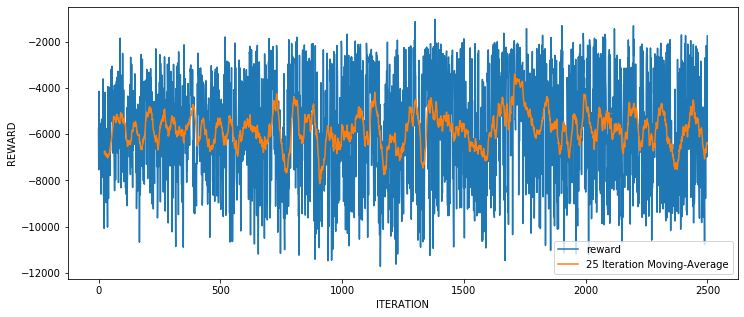

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

puck_results = pd.read_csv('results.csv')
puck_results['25-MA'] = puck_results['rewards'].rolling(window=25).mean()
puck_results['1000-MA'] = puck_results['rewards'].rolling(window=1000).mean()

plt.figure(figsize=(12,5))
plt.xlabel('ITERATION')
plt.ylabel('REWARD')
plt.plot(puck_results['rewards'], label = 'reward')
plt.plot(puck_results['25-MA'], label = '25 Iteration Moving-Average')
#plt.plot(puck_results['1000-MA'], label = '1,000 Iteration Moving-Average')
plt.legend(loc="lower right")
#plt.savefig('./puckworld_3.png')